In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [26]:
# Word2vec
import gensim


In [3]:
df = pd.read_csv('data_tambahan_cleaned.csv')

In [4]:
df_2 = pd.read_csv('df_lama_ne.csv')

In [5]:
df = pd.concat([df, df_2])

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.shape

(100533, 3)

In [8]:
df.head()

,translation,user,mbti
0,tonight,w_n_r00,ESFP
1,love seoul,w_n_r00,ESFP
2,c n ng l 3 ng th h h c c ch c ch n tr l u n,w_n_r00,ESFP
3,love vietnam much,w_n_r00,ESFP
4,thank 9 year since became winner team 9 year f...,w_n_r00,ESFP


In [15]:
df['EI'] = df['mbti'].str[0]
df['NS'] = df['mbti'].str[1]
df['FT'] = df['mbti'].str[2]
df['JP'] = df['mbti'].str[3]

In [9]:
df.drop_duplicates().shape

(100533, 3)

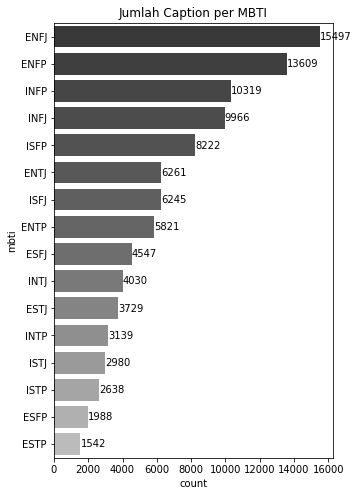

In [13]:
plt.subplots(figsize=(5, 8))
ax = sns.countplot(y="mbti", data=df, palette=("Greys_r_d"),
              order=df['mbti'].value_counts().index)

ax.set_title("Jumlah Caption per MBTI")
abs_values = df['mbti'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

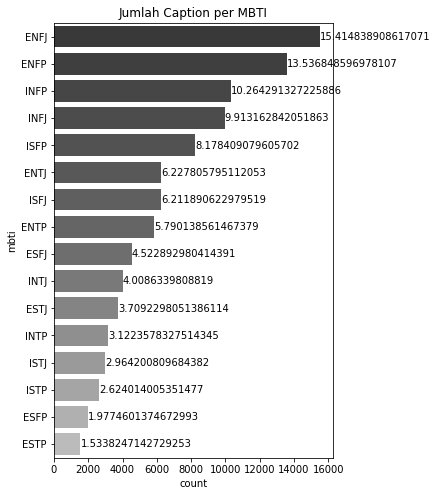

In [14]:
plt.subplots(figsize=(5, 8))
ax = sns.countplot(y="mbti", data=df, palette=("Greys_r_d"),
              order=df['mbti'].value_counts().index)

ax.set_title("Jumlah Caption per MBTI")
abs_values = df['mbti'].value_counts(ascending=False).values/df.shape[0]*100

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

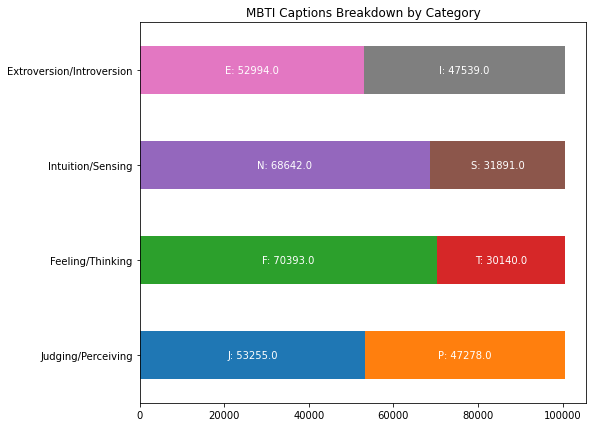

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create dataframe
df_chart = pd.DataFrame({'J': [len(df[df['JP'] == 'J']), np.nan, np.nan, np.nan],
                   'P': [len(df[df['JP'] == 'P']), np.nan, np.nan, np.nan],
                   'F': [np.nan, len(df[df['FT'] == 'F']), np.nan, np.nan],
                   'T': [np.nan, len(df[df['FT'] == 'T']), np.nan, np.nan],
                   'N': [np.nan, np.nan, len(df[df['NS'] == 'N']), np.nan],
                   'S': [np.nan, np.nan, len(df[df['NS'] == 'S']), np.nan],
                   'E': [np.nan, np.nan, np.nan, len(df[df['EI'] == 'E'])],
                   'I': [np.nan, np.nan, np.nan, len(df[df['EI'] == 'I'])]},
                  index=['Judging/Perceiving', 'Feeling/Thinking', 'Intuition/Sensing', 'Extroversion/Introversion'])


# plot dataframe
ax = df_chart.plot.barh(title="MBTI Captions Breakdown by Category",
                  legend=False,
                  figsize=(8,7), stacked=True)

labels = []
for j in df_chart.columns:
    for i in df_chart.index:
        label = str(j)+": " + str(df_chart.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='white')

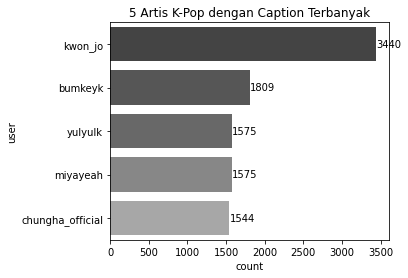

In [18]:
plt.subplots(figsize=(5, 4))
ax = sns.countplot(y="user", data=df, palette=("Greys_r_d"),
              order=df['user'].value_counts().iloc[:5].index)

ax.set_title("5 Artis K-Pop dengan Caption Terbanyak")
abs_values = df['user'].value_counts(ascending=False).iloc[:5].values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

In [19]:
df[df['user']=='chungha_official']

,translation,user,mbti,EI,NS,FT,JP
77578,chung ha 2nd studio album bare rare pt 1 chung...,chungha_official,ISFP,I,S,F,P
77579,chung ha 2nd studio album bare rare pt 1,chungha_official,ISFP,I,S,F,P
77580,chung ha 2nd studio album bare rare pt 1 http ...,chungha_official,ISFP,I,S,F,P
77581,much fun thank jestina estina official estinab...,chungha_official,ISFP,I,S,F,P
77582,joy movement fusalp thank,chungha_official,ISFP,I,S,F,P
...,...,...,...,...,...,...,...
79117,cheongha chungha 1st mini album hand highlight...,chungha_official,ISFP,I,S,F,P
79118,cheongha chungha know music video teaser 1,chungha_official,ISFP,I,S,F,P
79119,chungha 1st mini album hand photo teaser 2,chungha_official,ISFP,I,S,F,P
79120,chungha 1st mini album hand track list,chungha_official,ISFP,I,S,F,P


In [20]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

SEQUENCE_LENGTH = [50, 100, 200, 300]

In [21]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
df['translation']=df['translation'].astype(str)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 80426
TEST size: 20107


In [23]:
%%time
documents = [_text.split() for _text in df_train.translation] 

Wall time: 201 ms


In [24]:
w2v_models={}

In [29]:
%%time
for i in [50, 100, 200, 300]:
    w2v_models[i] = gensim.models.word2vec.Word2Vec(vector_size=i, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)
    w2v_models[i].build_vocab(documents)
    w2v_models[i].train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 43.1 s


In [43]:
print('Kata yang mirip dengan \'jeju\'')
for i in [50, 100, 200, 300]:
    print('Model Word2Vec dengan dimensi {0}'.format(i))
    print(w2v_models[i].wv.most_similar('jeju', topn=3))

Kata yang mirip dengan 'jeju'
Model Word2Vec dengan dimensi 50
[('island', 0.8645195960998535), ('tower', 0.6273694634437561), ('travel', 0.6015500426292419)]
Model Word2Vec dengan dimensi 100
[('island', 0.7553439140319824), ('travel', 0.5343033671379089), ('sea', 0.48532769083976746)]
Model Word2Vec dengan dimensi 200
[('island', 0.7377963662147522), ('sea', 0.5328781604766846), ('seaweed', 0.4613155722618103)]
Model Word2Vec dengan dimensi 300
[('island', 0.7232010960578918), ('sea', 0.47694095969200134), ('ash', 0.422532320022583)]


In [45]:
print('Kata yang mirip dengan \'seoul\'')
for i in [50, 100, 200, 300]:
    print('Model Word2Vec dengan dimensi {0}'.format(i))
    print(w2v_models[i].wv.most_similar('seoul', topn=3))

Kata yang mirip dengan 'seoul'
Model Word2Vec dengan dimensi 50
[('hyundai', 0.702468991279602), ('itaewon', 0.6721617579460144), ('held', 0.6634047627449036)]
Model Word2Vec dengan dimensi 100
[('mapo', 0.6384389996528625), ('hyundai', 0.61864173412323), ('held', 0.5758407711982727)]
Model Word2Vec dengan dimensi 200
[('mapo', 0.5783994197845459), ('hyundai', 0.538345456123352), ('held', 0.48671871423721313)]
Model Word2Vec dengan dimensi 300
[('mapo', 0.5523377060890198), ('hyundai', 0.5490394830703735), ('held', 0.5052875876426697)]


In [41]:
w2v_models[50].wv.most_similar('jeju', topn=3)

[('island', 0.8645195960998535),
 ('tower', 0.6273694634437561),
 ('travel', 0.6015500426292419)]

In [33]:
w2v_models[100].wv.most_similar('brother')

[('younger', 0.6411949992179871),
 ('youngest', 0.4952949285507202),
 ('hyung', 0.4542354345321655),
 ('sister', 0.4217952787876129),
 ('wook', 0.419927179813385),
 ('beloved', 0.4061117470264435),
 ('eldest', 0.39889955520629883),
 ('cheered', 0.3983571529388428),
 ('jinwoo', 0.36930179595947266),
 ('jungle', 0.3657967150211334)]

In [34]:
w2v_models[200].wv.most_similar('brother')

[('younger', 0.5292144417762756),
 ('hyung', 0.41338130831718445),
 ('youngest', 0.36497509479522705),
 ('senior', 0.3625899851322174),
 ('wook', 0.3574250638484955),
 ('ferry', 0.3458233177661896),
 ('law', 0.34338030219078064),
 ('appear', 0.3385172188282013),
 ('hoon', 0.3333868980407715),
 ('byung', 0.3280768096446991)]